Missing Values:
 G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64


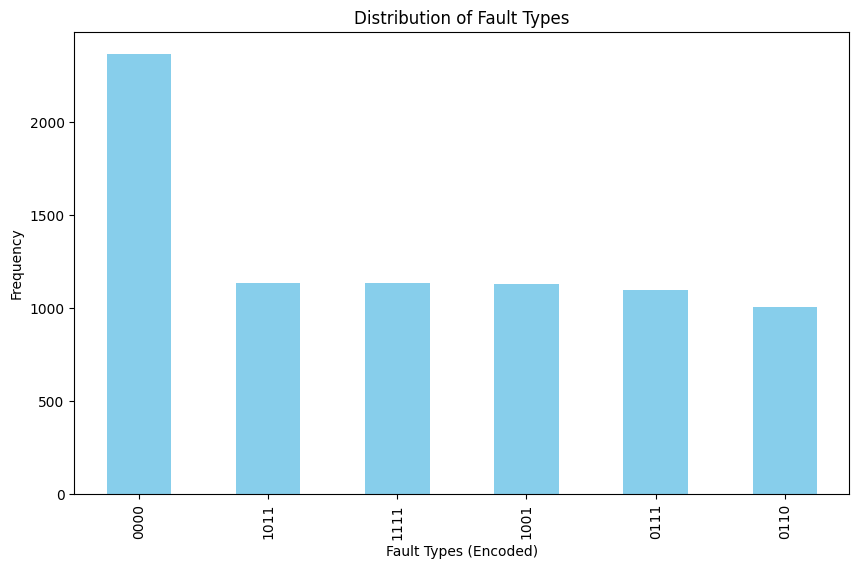

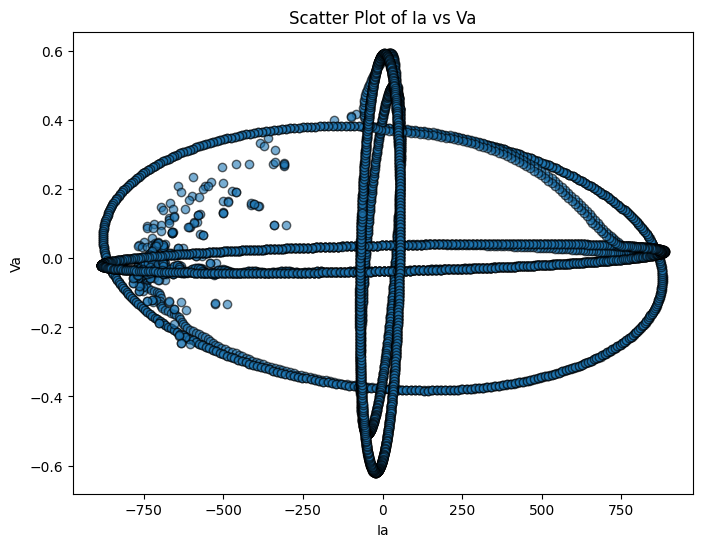

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3171 - loss: 1.6359 - val_accuracy: 0.5835 - val_loss: 1.0626
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5980 - loss: 1.0225 - val_accuracy: 0.7576 - val_loss: 0.6440
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6972 - loss: 0.7255 - val_accuracy: 0.7917 - val_loss: 0.4961
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.5974 - val_accuracy: 0.8100 - val_loss: 0.4302
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.5177 - val_accuracy: 0.8037 - val_loss: 0.3977
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7593 - loss: 0.5003 - val_accuracy: 0.8140 - val_loss: 0.3701
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4614 - val_accuracy: 0.8140 - val_loss: 0.3535
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4255 - val_accuracy: 0.

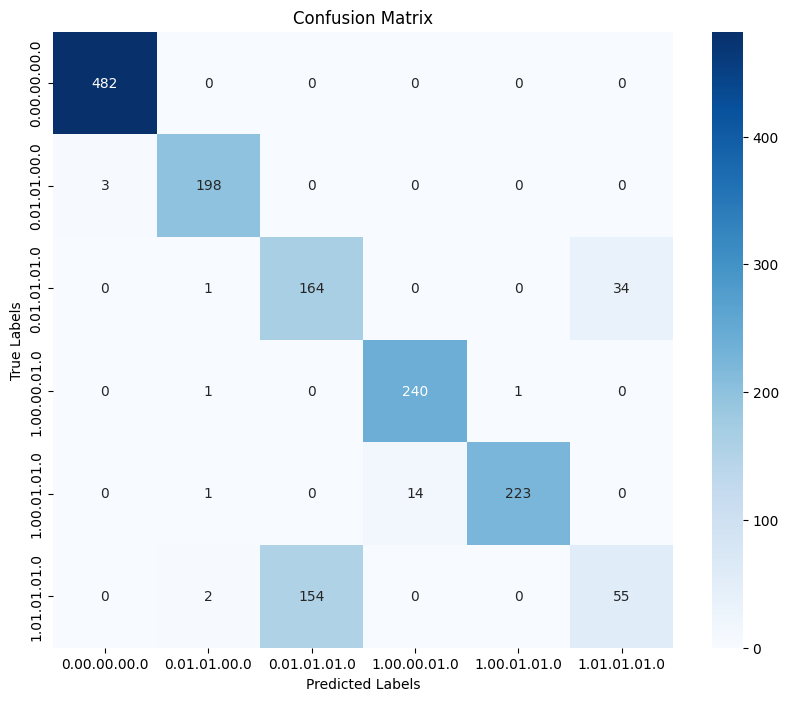

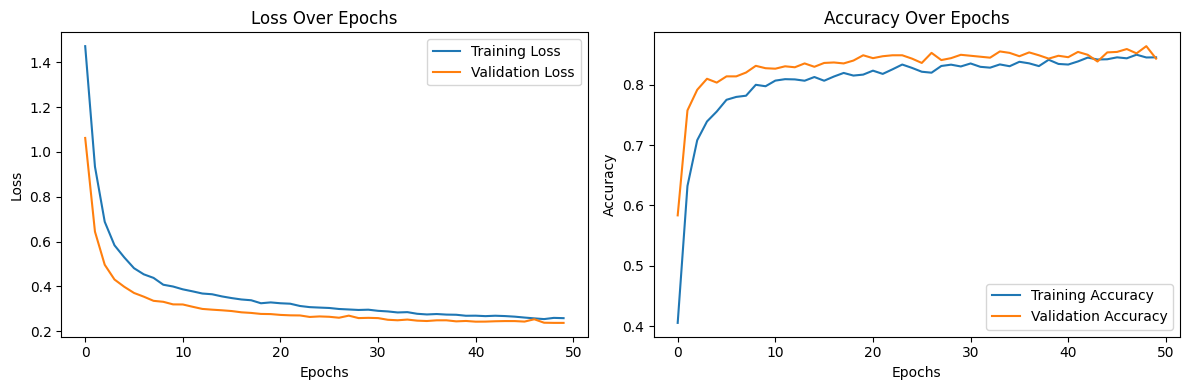

Decision Tree Accuracy: 0.8919262555626192
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       1.00      1.00      1.00       201
           2       0.58      0.64      0.61       199
           3       0.99      1.00      0.99       242
           4       1.00      0.99      0.99       238
           5       0.62      0.55      0.58       211

    accuracy                           0.89      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.89      0.89      0.89      1573

Model saved successfully.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 2: Load the Dataset
df = pd.read_csv('classData.csv')

# Step 3: Clean the Data
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop any rows with missing values (if necessary)
df.dropna(inplace=True)

# Step 4: Data Visualization
# Plot the distribution of fault types
fault_counts = df[['G', 'C', 'B', 'A']].apply(lambda row: ''.join(row.astype(str)), axis=1).value_counts()
plt.figure(figsize=(10, 6))
fault_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Fault Types')
plt.xlabel('Fault Types (Encoded)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot example (Ia vs Va)
plt.figure(figsize=(8, 6))
plt.scatter(df['Ia'], df['Va'], alpha=0.6, edgecolors='k')
plt.title('Scatter Plot of Ia vs Va')
plt.xlabel('Ia')
plt.ylabel('Va')
plt.show()

# Step 5: Data Preprocessing
# Normalize input features
scaler = StandardScaler()
inputs = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
df[inputs] = scaler.fit_transform(df[inputs])

# Encode fault labels into a single categorical variable
def encode_fault(row):
    return f"{row['G']}{row['C']}{row['B']}{row['A']}"
df['Fault_Type'] = df.apply(encode_fault, axis=1)
label_encoder = LabelEncoder()
df['Fault_Type_Encoded'] = label_encoder.fit_transform(df['Fault_Type'])

# Split data into inputs and outputs
X = df[inputs]
y = df['Fault_Type_Encoded']

# Step 6: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Step 8: Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 9: Model Evaluation
# Evaluate on test data
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 10: Advanced Visualization
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 11: Explore Other Algorithms
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# Save and download the model
model.save('/mnt/data/fault_classification_model.h5')
print("Model saved successfully.")